# Build Classification Model

# 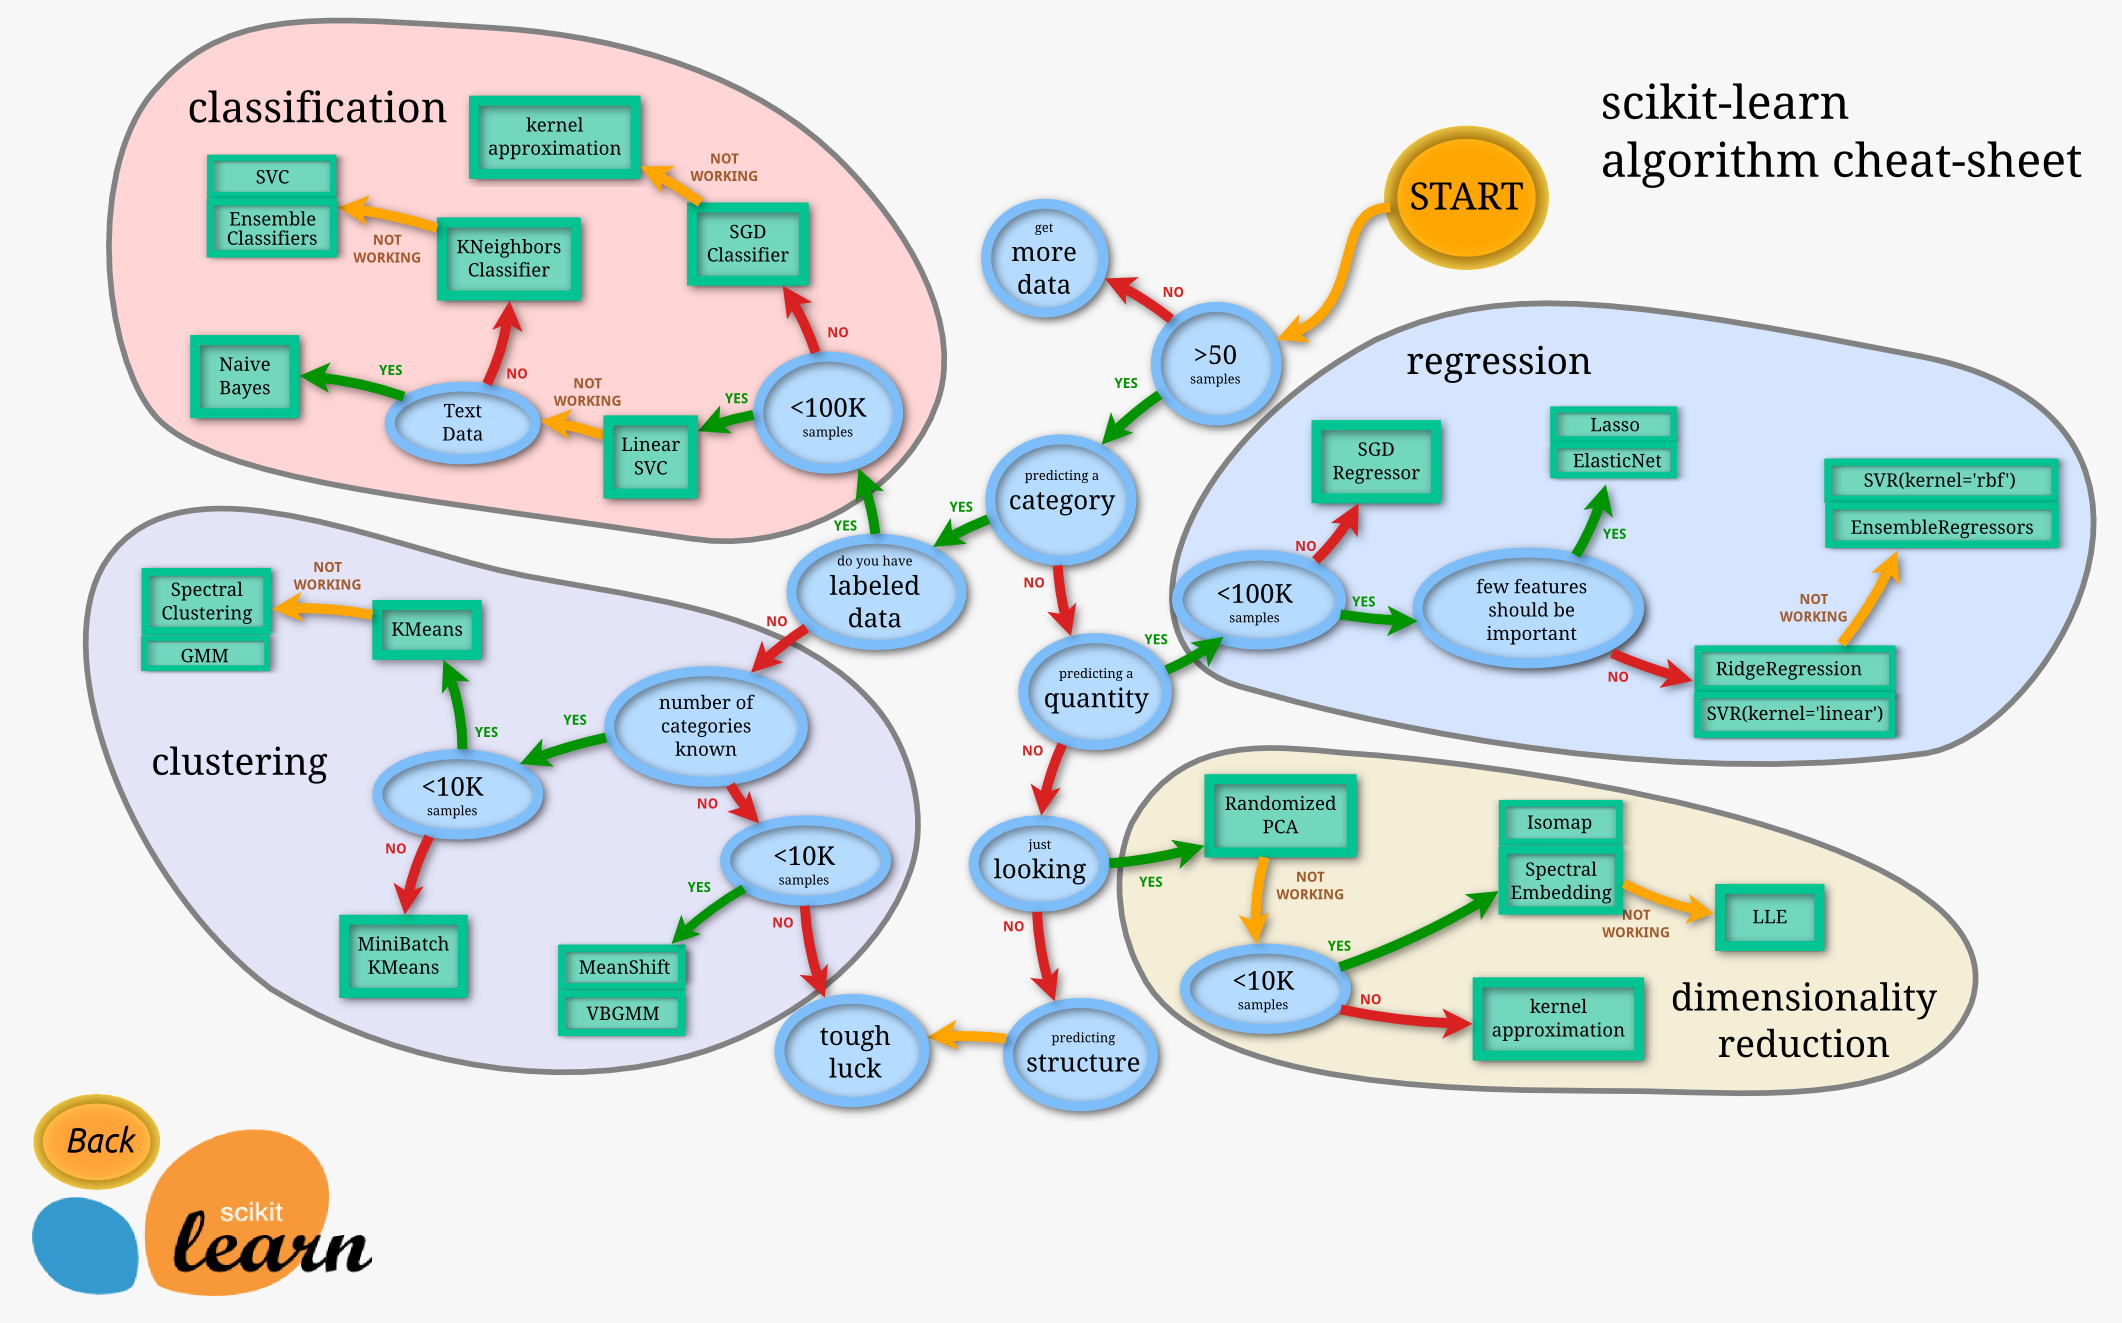

The plan
This map is very helpful once you have a clear grasp of your data, as you can 'walk' along its paths to a decision:

- We have >50 samples
- We want to predict a category
- We have labeled data
- We have fewer than 100K samples
- ✨ We can choose a Linear SVC
- If that doesn't work, since we have numeric data
    - We can try a ✨ KNeighbors Classifier
        -  If that doesn't work, try ✨ SVC and ✨ Ensemble Classifiers

In [71]:
import pandas as pd
cuisines_df = pd.read_csv("../data/cleaned_cuisines.csv")
# cuisines_df.head()
cuisines_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 382 entries, Unnamed: 0 to zucchini
dtypes: int64(381), object(1)
memory usage: 11.6+ MB


In [72]:
cuisines_label_df = cuisines_df['cuisine']
# cuisines_label_df.head()
cuisines_label_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3995 entries, 0 to 3994
Series name: cuisine
Non-Null Count  Dtype 
--------------  ----- 
3995 non-null   object
dtypes: object(1)
memory usage: 31.3+ KB


In [73]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
# Import the needed libraries:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

In [79]:
# Split your training and test data

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

# print(X_train.info)
# print(y_train.info)
# print(y_test.info)
# print(y_train.info)

In [76]:
C = 10
# Create different classifiers.
classifiers = {
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,random_state=0),
    'KNN classifier': KNeighborsClassifier(C),
    'SVC': SVC(),
    'RFST': RandomForestClassifier(n_estimators=100),
    'ADA': AdaBoostClassifier(n_estimators=100)
    
}

linear_svc = SVC(kernel='linear', C=C, probability=True,random_state=0)
print('linear SVC: ', linear_svc)

knn = KNeighborsClassifier(C)
print('knn: ', knn)

svc = SVC()
print('SVC: ', svc)

rfst = RandomForestClassifier(n_estimators=100)
print('Random forrest: ', rfst)

ada = AdaBoostClassifier(n_estimators=100)
print('ADA:', ada)



linear SVC:  SVC(C=10, kernel='linear', probability=True, random_state=0)
knn:  KNeighborsClassifier(n_neighbors=10)
SVC:  SVC()
Random forrest:  RandomForestClassifier()
ADA: AdaBoostClassifier(n_estimators=100)


In [77]:
# Create LinearSVC model
svm_model = LinearSVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7906588824020017
Classification Report:
              precision    recall  f1-score   support

     chinese       0.72      0.69      0.71       235
      indian       0.89      0.91      0.90       218
    japanese       0.76      0.68      0.72       266
      korean       0.82      0.83      0.82       236
        thai       0.76      0.86      0.81       244

    accuracy                           0.79      1199
   macro avg       0.79      0.79      0.79      1199
weighted avg       0.79      0.79      0.79      1199



c:\ProgramData\anaconda3\envs\Python_3-12-1\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [82]:
# Convert input data to contiguous memory layout
X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)

# Create KNN model with 10 neighbors
knn_model = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn_model.fit(X_train_contiguous, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_contiguous)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7381150959132611
Classification Report:
              precision    recall  f1-score   support

     chinese       0.58      0.79      0.67       220
      indian       0.84      0.83      0.84       240
    japanese       0.69      0.82      0.75       257
      korean       0.94      0.58      0.71       233
        thai       0.78      0.66      0.72       249

    accuracy                           0.74      1199
   macro avg       0.77      0.74      0.74      1199
weighted avg       0.77      0.74      0.74      1199



In [84]:
# Convert input data to contiguous memory layout
X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)

# Create SVC model
svc_model = SVC()

# Train the model
svc_model.fit(X_train_contiguous, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_contiguous)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8206839032527106
Classification Report:
              precision    recall  f1-score   support

     chinese       0.73      0.75      0.74       220
      indian       0.89      0.91      0.90       240
    japanese       0.81      0.79      0.80       257
      korean       0.91      0.80      0.85       233
        thai       0.78      0.85      0.81       249

    accuracy                           0.82      1199
   macro avg       0.82      0.82      0.82      1199
weighted avg       0.82      0.82      0.82      1199



In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Convert input data to contiguous memory layout
X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)

# Create Random Forest Classifier model with 100 estimators
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model.fit(X_train_contiguous, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_contiguous)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8331943286071727
Classification Report:
              precision    recall  f1-score   support

     chinese       0.80      0.78      0.79       220
      indian       0.88      0.91      0.90       240
    japanese       0.85      0.77      0.81       257
      korean       0.85      0.83      0.84       233
        thai       0.79      0.87      0.83       249

    accuracy                           0.83      1199
   macro avg       0.83      0.83      0.83      1199
weighted avg       0.83      0.83      0.83      1199



In [86]:
# Convert input data to contiguous memory layout
X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)

# Create AdaBoost Classifier model with 100 estimators
adaboost_model = AdaBoostClassifier(n_estimators=100)

# Train the model
adaboost_model.fit(X_train_contiguous, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test_contiguous)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7097581317764804
Classification Report:
              precision    recall  f1-score   support

     chinese       0.60      0.55      0.58       220
      indian       0.88      0.79      0.83       240
    japanese       0.68      0.56      0.62       257
      korean       0.73      0.82      0.77       233
        thai       0.66      0.82      0.73       249

    accuracy                           0.71      1199
   macro avg       0.71      0.71      0.71      1199
weighted avg       0.71      0.71      0.71      1199

